## Amazon Products Dataset 2023

Данные о продажах на Amazon в Америке за сентябрь 2023г

Источник https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Задачи:

#### Какие товары являются самыми доходными?

#### Какие товары являются самыми популярными?

### Подготовка данных

In [2]:
categories = pd.read_csv('amazon_categories.csv')
categories.head(10)

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies
5,6,Sewing Products
6,7,Craft & Hobby Fabric
7,8,Needlework Supplies
8,9,"Arts, Crafts & Sewing Storage"
9,10,"Painting, Drawing & Art Supplies"


Таблица **amazon_categories** содержит расшифровку категорий товаров

**id** - идентификатор категории товара, является ключом в таблице amazon_products (столбец category_id)

**category_name** - наименование категориии

In [3]:
df = pd.read_csv('amazon_products.csv')
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


Таблица **amazon_products** содержит данные о товарах:

**asin** - идентификатор товара

**title** - наименование товара

**imgUrl** - ссылка на картинку товара

**productURL** - ссылка на товар

**stars** - рейтинг товара. Если 0 - нет оценок

**reviews** - количество отзывов. Если 0 - нет отзывов

**price** - цена на данный момент

**listPrice** - цена до скидки, если 0 - скидок нет

**category_id** - id категории товара

**isBestSeller** - есть статус бестселлера Amazon или нет

**boughtInLastMonth** - продано в прошлом месяце в штуках



In [4]:
# Удалим колонки asin, imgUrl, productURL

products = df.drop( columns = ['asin', 'imgUrl', 'productURL'])
products.head()

,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00,104,False,2000
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99,104,False,1000
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99,104,False,300
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37,104,False,400
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99,104,False,400


In [5]:
# Объединим таблицы

products_data = pd.merge(products, categories, left_on = 'category_id', right_on = 'id')
products_data.head()

,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99,104,False,400,104,Suitcases


In [6]:
# Удаляем лишние столбцы category_id, id

products_data = products_data.drop(columns = ['category_id', 'id'])
products.head()

,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00,104,False,2000
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99,104,False,1000
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99,104,False,300
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37,104,False,400
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99,104,False,400


### Исследовательский анализ

In [7]:
# Смотрим типы данных и пропущенные значения

products_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426337 entries, 0 to 1426336
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   title              1426336 non-null  object 
 1   stars              1426337 non-null  float64
 2   reviews            1426337 non-null  int64  
 3   price              1426337 non-null  float64
 4   listPrice          1426337 non-null  float64
 5   isBestSeller       1426337 non-null  bool   
 6   boughtInLastMonth  1426337 non-null  int64  
 7   category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 88.4+ MB


In [8]:
# Проверяем еще раз пропущенные значения

products_data.isnull().sum()

title                1
stars                0
reviews              0
price                0
listPrice            0
isBestSeller         0
boughtInLastMonth    0
category_name        0
dtype: int64

In [9]:
# Удаляем пропущенные значения

products_data = products_data.dropna()
products_data.shape

(1426336, 8)

In [10]:
# Смотрим описательные статистики по всем колонкам

products_data.describe(include = 'all')

,title,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
count,1426336,1.426336e+06,1.426336e+06,1.426336e+06,1.426336e+06,1426336,1.426336e+06,1426336
unique,1385430,NaN,NaN,NaN,NaN,2,NaN,248
top,Men's Sneaker,NaN,NaN,NaN,NaN,False,NaN,Girls' Clothing
freq,89,NaN,NaN,NaN,NaN,1417816,NaN,28619
mean,NaN,3.999511e+00,1.807509e+02,4.337541e+01,1.244917e+01,NaN,1.419824e+02,NaN
std,NaN,1.344293e+00,1.761454e+03,1.302893e+02,4.611200e+01,NaN,8.362722e+02,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,NaN,0.000000e+00,NaN
50%,NaN,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,NaN,0.000000e+00,NaN
75%,NaN,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,NaN,5.000000e+01,NaN


Men's Sneaker - самое частое название в карточке товара (89 раз)

Медианное значение рейтинга - 4.4

Медианное значение количества отзывов - 0, а среднее - 181, 75% товаров не имеет отзывов. Интересно посмотреть, как распределены отзывы, какое количество товаров имеет отзывы

Средняя цена товара - 43 доллара, медиана - 20, интерквартильный размах 12-36. Среднее не попадает в интерквартильный размах, это связано с большим разбросом цен. Минимум - 0, цена не может быть нулевой, нужно проверить эти значения и, возможно, удалить

75% товаров не имеют скидки, средняя скидка - 1.2 доллара, максимум - 999, очень большой разброс

Подавляющее большинство товаров не имеет статус бестселлера

50% товаров имеют количество продаж в прошлом месяце 0

В наборе данных 248 категорий товаров, мода - Girls' Clothing, встречается 28619 раз

In [11]:
# Сколько строк содержит нулевую цену

products_data[products_data.price == 0]

,title,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
177,Airconic Hardside Expandable Luggage with Spin...,3.8,0,0.0,0.0,False,0,Suitcases
180,4 KIX 2.0 Softside Expandable Luggage with Spi...,4.5,0,0.0,0.0,False,0,Suitcases
252,OCEAN HOLIDAY Luggage with Double Spinner Whee...,0.0,0,0.0,0.0,False,0,Suitcases
328,Merge Short Trip Expandable Packing Case Mediu...,3.9,0,0.0,0.0,False,0,Suitcases
445,"Suitcase Caster, 1 Pair Luggage Swivel Wheels ...",4.0,0,0.0,0.0,False,0,Suitcases
...,...,...,...,...,...,...,...,...
1425309,KeylessOption Keyless Entry Remote Control Unc...,4.2,0,0.0,0.0,False,0,Car Electronics & Accessories
1425702,"Sony XAVAX1000 6.2"" (15.7 cm) Apple CarPlay Me...",4.5,0,0.0,0.0,False,0,Car Electronics & Accessories
1426014,"Pioneer TS-G1620F 6-1/2"" 2-Way Coaxial Speaker...",4.5,0,0.0,0.0,False,0,Car Electronics & Accessories
1426219,Flipstik MagStik Adaptor - for Removability an...,3.8,0,0.0,0.0,False,0,Car Electronics & Accessories


In [12]:
# 32772 товара имеют цену 0, посмотрим в каких они категориях

products_data.groupby('category_name').count()

,title,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth
category_name,,,,,,,
Abrasive & Finishing Products,8646,8646,8646,8646,8646,8646,8646
Accessories & Supplies,4226,4226,4226,4226,4226,4226,4226
Additive Manufacturing Products,7619,7619,7619,7619,7619,7619,7619
Arts & Crafts Supplies,8313,8313,8313,8313,8313,8313,8313
"Arts, Crafts & Sewing Storage",7592,7592,7592,7592,7592,7592,7592
...,...,...,...,...,...,...,...
Women's Watches,6542,6542,6542,6542,6542,6542,6542
"Xbox 360 Games, Consoles & Accessories",3809,3809,3809,3809,3809,3809,3809
"Xbox One Games, Consoles & Accessories",3582,3582,3582,3582,3582,3582,3582


In [13]:
# Строки с нулевой ценой представлены во всех 248 категориях товаров, 
# значит, можно удалить их, репрезентативность выборки это не испортит

products_data = products_data[products_data.price > 0]
products_data.shape

(1393564, 8)

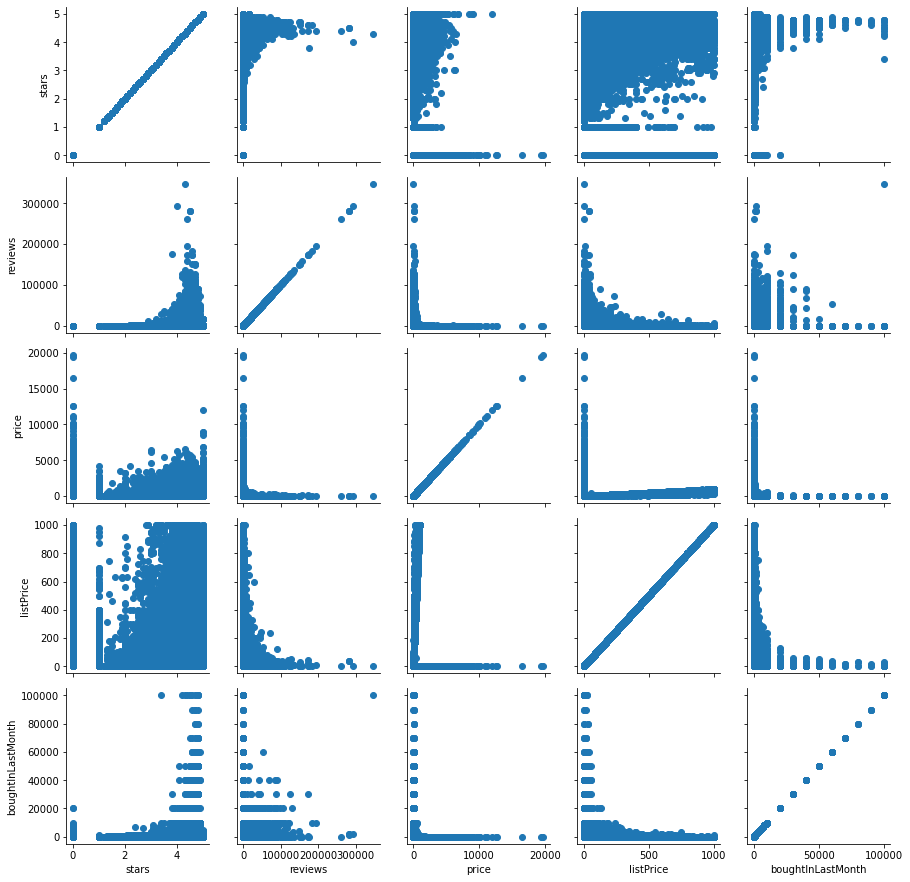

In [14]:
# Посмотрим как распределены количественные переменные

products_subset = products_data.copy()
products_subset.drop(['title', 'category_name', 'isBestSeller'], axis=1, inplace=True)

pair_grid_plot_1 = sns.PairGrid(products_subset)
pair_grid_plot_1.map(plt.scatter);

Чем выше рейтинг, тем больше отзывов на товар

Чем выше рейтинг у товара, тем больше его покупали в прошлом месяце

Чем больше отзывов, тем меньше товаров купили в прошлом месяце, это странно, нужно отдельно посмотреть на reviews

Цена и рейтинг на графике не имеют сильной зависимости. У товаров с высокой ценой вообще нет рейтинга, вероятно, это связано с тем, что товары с высокой стоимостью покупают реже

### Какой товар самый продаваемый?

In [15]:
products_data[products_data.boughtInLastMonth == products_data.boughtInLastMonth.max()]

,title,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
459411,"Bounty Quick Size Paper Towels, White, 8 Famil...",4.8,0,24.42,0.00,True,100000,Household Cleaning Supplies
459412,Amazon Brand - Presto! Flex-a-Size Paper Towel...,4.7,0,28.28,0.00,False,100000,Household Cleaning Supplies
459413,Stardrops - The Pink Stuff - The Miracle All P...,4.4,0,4.99,5.97,True,100000,Household Cleaning Supplies
459415,"Amazon Basics 2-Ply Paper Towels, Flex-Sheets,...",4.2,0,22.86,0.00,False,100000,Household Cleaning Supplies
589570,"Hismile v34 Colour Corrector, Tooth Stain Remo...",3.4,0,20.69,29.00,True,100000,Oral Care Products
984084,LMNT Zero-Sugar Electrolytes - Variety Salt - ...,4.5,0,25.00,0.00,False,100000,Sports Nutrition Products
994446,essence | Lash Princess False Lash Effect Masc...,4.3,346563,4.99,0.00,True,100000,Makeup
1087912,"Nespresso Capsules VertuoLine, Medium and Dark...",4.8,0,37.50,0.00,False,100000,Kitchen & Dining
1087914,"Dixie Paper Plates, 8 1/2 inch, Dinner Size Pr...",4.8,0,5.99,6.89,True,100000,Kitchen & Dining
1292937,COSRX Snail Mucin 96% Power Repairing Essence ...,4.6,0,15.00,25.00,True,100000,Personal Care Products


Самыми продаваемыми товарами оказались бытовые товары: бумажные полотенца, чистящие средства, средство для удаления пятен с зубов, электролиты для воды, тушь, капсулы для кофемашины, бумажные одноразовые тарелки, эссенция для лица, пластыри от прыщей, салфетки для удаления макияжа. То есть товары для дома и персонального ухода.

В наборе данных нет отзывов (кроме туши) на эти самые продаваемые товары. Если перейти по ссылкам и посмотреть карточку товара на сайте Amazon, у них у всех много тысяч отзывов. Следовательно, при сборе данных были допущены ошибки.

Посмотрим, какое количество товаров не имеет данных о отзывах

In [16]:
print(round(len(products_data[products_data.reviews == 0])/len(products_data)*100, 1), 
      '% товаров не имеют данных о отзывах')

79.2 % товаров не имеют данных о отзывах


In [17]:
#  Так как столбец reviews содержит некорректные данные, удалим его

products_data.drop(['reviews'], axis=1, inplace=True)
products_data.head()

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,139.99,0.00,False,2000,Suitcases
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,169.99,209.99,False,1000,Suitcases
2,Platinum Elite Softside Expandable Checked Lug...,4.6,365.49,429.99,False,300,Suitcases
3,Freeform Hardside Expandable with Double Spinn...,4.6,291.59,354.37,False,400,Suitcases
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,174.99,309.99,False,400,Suitcases


In [18]:
# Добавим столбец доход

products_data['income'] = products_data.price * products_data.boughtInLastMonth
products_data.head()

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name,income
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,139.99,0.00,False,2000,Suitcases,279980.0
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,169.99,209.99,False,1000,Suitcases,169990.0
2,Platinum Elite Softside Expandable Checked Lug...,4.6,365.49,429.99,False,300,Suitcases,109647.0
3,Freeform Hardside Expandable with Double Spinn...,4.6,291.59,354.37,False,400,Suitcases,116636.0
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,174.99,309.99,False,400,Suitcases,69996.0


### Самый доходный товар (вне зависимости от категории)

In [19]:
products_data[products_data.income == products_data.income.max()]

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name,income
196028,PlayStation 5 Console (PS5),4.8,499.99,0.0,False,10000,Video Games,4999900.0


Самый высокодоходный товар за сентябрь - **PlayStation 5 Console (PS5)**. Посмотрим подробнее, какие товары в категории видеоигр оказались самыми доходными

In [20]:
game_max = products_data[products_data['category_name'] == 
                         'Video Games'].sort_values('income', ascending = False).head(10)
game_max

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name,income
196028,PlayStation 5 Console (PS5),4.8,499.99,0.00,False,10000,Video Games,4999900.0
196030,Xbox Series X,4.8,489.99,0.00,True,10000,Video Games,4899900.0
196031,Meta Quest 2 — Advanced All-In-One Virtual Rea...,4.7,299.00,0.00,True,10000,Video Games,2990000.0
196032,Nintendo Switch™ with Neon Blue and Neon Red J...,4.8,299.00,0.00,True,9000,Video Games,2691000.0
196037,Xbox Series S – 512GB SSD All-Digital Gaming C...,4.8,298.00,0.00,False,5000,Video Games,1490000.0
196040,Nintendo Switch – OLED Model w/ White Joy-Con,4.8,339.00,0.00,False,4000,Video Games,1356000.0
196038,Xbox Elite Series 2 Core Wireless Controller –...,4.5,99.00,129.99,False,9000,Video Games,891000.0
196047,Meta Quest 2 - Advanced All-In-One Virtual Rea...,4.6,269.99,299.00,False,3000,Video Games,809970.0
196029,Final Fantasy VII Rebirth - Deluxe Edition (PS5),0.0,99.99,0.00,False,8000,Video Games,799920.0
196042,"Xbox Wireless Headset – Xbox Series X|S, Xbox ...",4.5,91.79,99.99,False,8000,Video Games,734320.0


In [21]:
video_games = products_data[products_data['category_name'] == 'Video Games']
video_games.describe()

,stars,price,listPrice,boughtInLastMonth,income
count,5149.000000,5149.000000,5149.000000,5149.000000,5.149000e+03
mean,4.309186,55.310511,24.537199,168.712371,1.181722e+04
std,0.849573,117.413128,55.344590,636.029649,1.223241e+05
min,0.000000,2.500000,0.000000,0.000000,0.000000e+00
25%,4.300000,19.990000,0.000000,0.000000,0.000000e+00
50%,4.500000,29.990000,0.000000,0.000000,0.000000e+00
75%,4.700000,51.930000,32.990000,100.000000,3.998000e+03
max,5.000000,4499.990000,999.990000,10000.000000,4.999900e+06


50% товаров в категории видеоигр ни разу не покупали в прошлом месяце. Для дальнейшего анализа возьмем медианное значение показателей товаров, которые купили хотя бы 1 раз в прошлом месяце

In [22]:
video_games.query('boughtInLastMonth > 0')[['stars', 
                            'price', 'listPrice', 'boughtInLastMonth', 'income']].median()

stars                   4.60
price                  33.47
listPrice               0.00
boughtInLastMonth     100.00
income               3999.00
dtype: float64

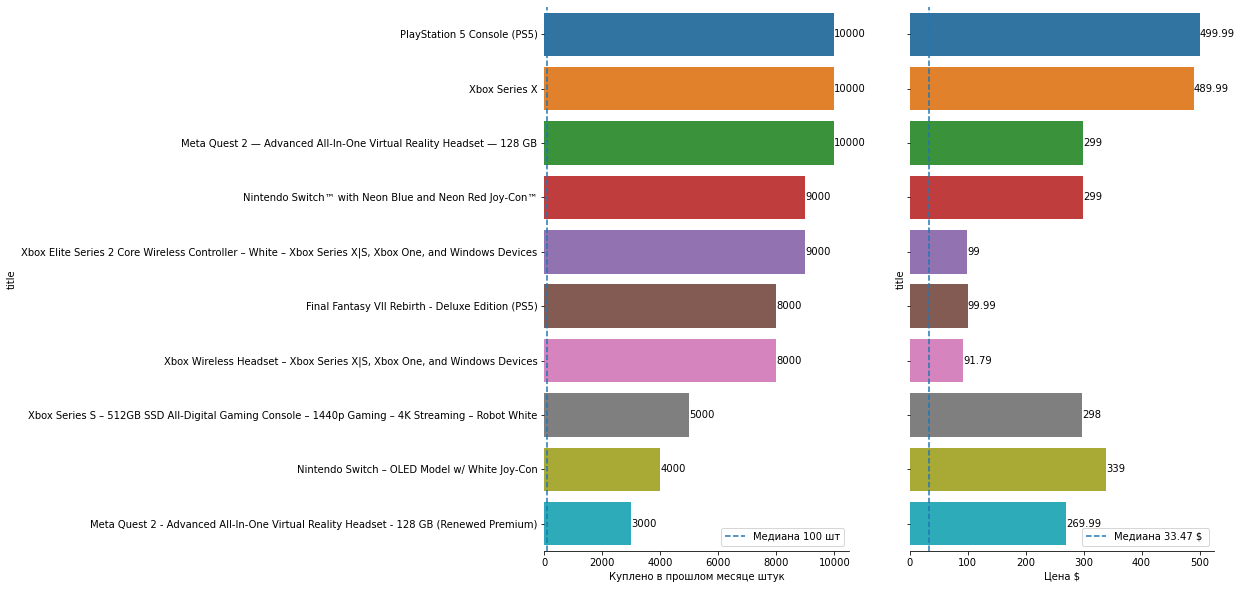

In [23]:
game_max = game_max.sort_values('boughtInLastMonth', ascending = False)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 10))
sns.barplot(x = game_max['boughtInLastMonth'], y = game_max['title'], ax=ax0)
sns.barplot(x = game_max['price'], y = game_max['title'], ax=ax1)
ax0.set(xlabel="Куплено в прошлом месяце штук")
ax1.set(xlabel="Цена $")
ax1.bar_label(ax1.containers[0])
ax0.bar_label(ax0.containers[0], fontsize=10)
ax0.axvline(x=100, label="Медиана 100 шт", linestyle="--")
ax0.legend()
ax1.axvline(x=33.47, label="Медиана 33.47 $ ", linestyle="--")
ax1.legend()
sns.despine(left=True);


Самые покупаемые товары: игровые приставки PlayStation 5, Xbox, набор виртуальной реальности Meta Quest 2 и консоль Nintendo Switch.

Эти товары - абсолютные лидеры по количеству продаж, их покупают, не смотря на то, что цены на них намного выше средних по категории.

### Самые популярные слова в категории Video Games



Как выяснилось ранее, 50% товаров в категории видеоигр ни разу не покупали в прошлом месяце. Для анализа популярности слов в названии будем использовать те товары, которые купили более 100 раз.

In [24]:
# подключаем встроенный модуль работы со строками
import string

# подключаем регулярные выражения
import re

# подключаем библиотеку для работы с текстом
import nltk

# подключаем статистику 
from nltk.probability import FreqDist

# из библиотеки обработки текста подключаем модуль для токенизации слов
from nltk import word_tokenize

# подключаем модуль со стоп-словами
from nltk.corpus import stopwords

# подключаем библиотеку для создания облака слов
from wordcloud import WordCloud

In [25]:
#Функция подготовки текста к токенизации

def prep(text):
    
# Переводим список в строку с пробелами между словами
    text = ' '.join(str(ch) for ch in text)
#Переводим все символы в нижний регистр    
    text = text.lower()    
# добавляем к стандартным знакам пунктуации кавычки и многоточие
    spec_chars = string.punctuation + '«»\t—…’'
# очищаем текст от знаков препинания
    text = "".join([ch for ch in text if ch not in spec_chars])
# убираем из текста цифры    
    text = "".join([ch for ch in text if ch not in string.digits])
    
    return text


In [26]:
# Копируем названия товаров в список
text = video_games.query('boughtInLastMonth > 110')['title'].tolist()

# Применяем функцию подготовки текста
text = prep(text)
text

'playstation  console ps final fantasy vii rebirth  deluxe edition ps xbox series x meta quest   advanced allinone virtual reality headset   gb nintendo switch™ with neon blue and neon red joy‑con™ marvels spiderman  – ps launch edition playstation dualsense wireless controller – midnight black unicorn overlord collectors edition  nintendo switch xbox series s – gb ssd alldigital gaming console – p gaming – k streaming – robot white xbox elite series  core wireless controller – white – xbox series xs xbox one and windows devices nintendo switch – oled model w white joycon the legend of zelda tears of the kingdom  nintendo switch us version xbox wireless headset – xbox series xs xbox one and windows devices xbox core wireless controller – carbon black – xbox series xs xbox one and windows devices mortal kombat   playstation meta quest   advanced allinone virtual reality headset   gb renewed premium mario kart  deluxe  us version madden nfl   playstation  sony official playstation  duals

In [27]:
# добавляем стоп-слова
english_stopwords = stopwords.words("english")
words = ['pc', 'xs', 'x']
english_stopwords.extend(words)

# токенизируем текст
text_tokens = word_tokenize(text)

# перестраиваем токены, не учитывая стоп-слова
text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]

#приводим токены к текстовому виду
text = nltk.Text(text_tokens)

# считаем частоту слов
fdist_sw = FreqDist(text)

# показываем самые популярные
print(fdist_sw.most_common(20))

[('switch', 530), ('nintendo', 474), ('xbox', 284), ('controller', 282), ('playstation', 148), ('wireless', 136), ('edition', 125), ('one', 121), ('series', 117), ('ps', 115), ('game', 111), ('case', 95), ('black', 93), ('gaming', 93), ('compatible', 92), ('accessories', 80), ('quest', 76), ('pro', 63), ('version', 60), ('console', 55)]


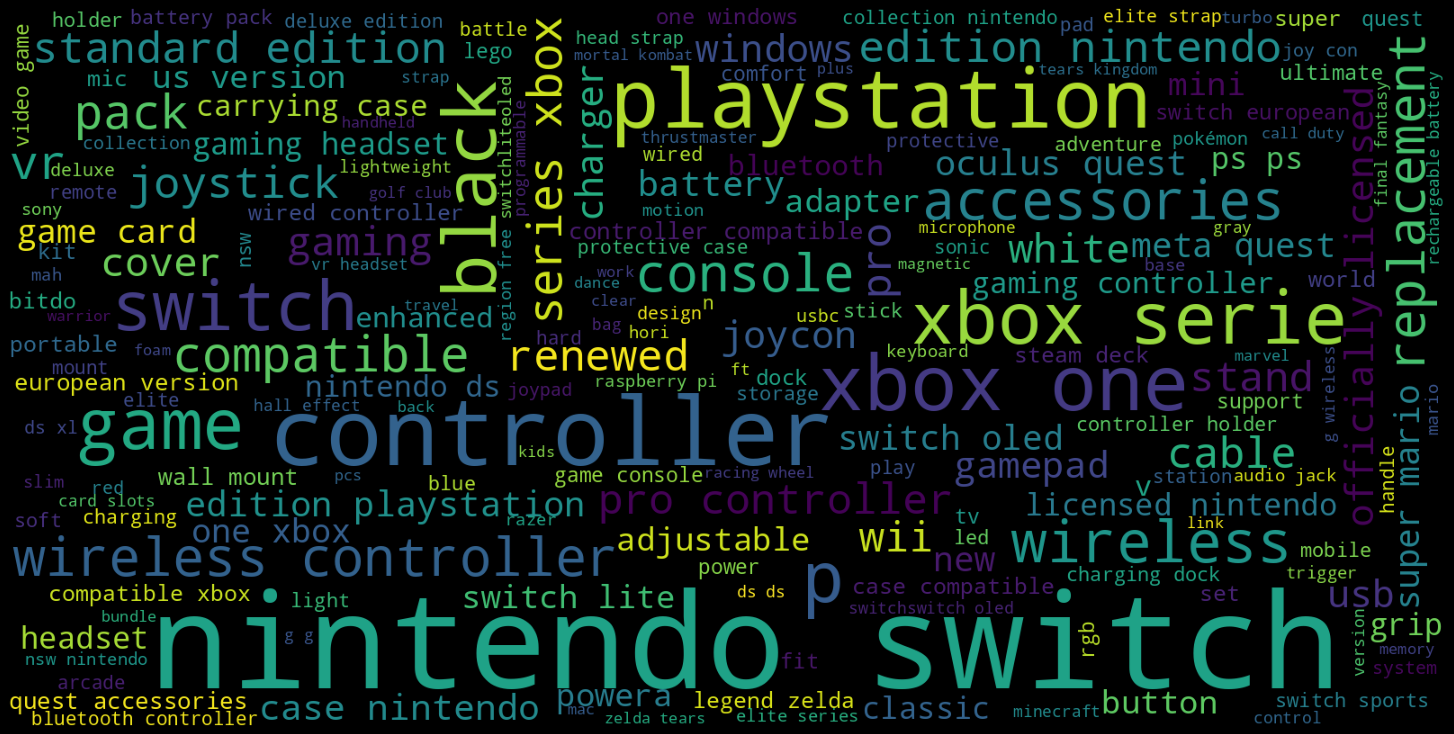

In [28]:
# переводим всё в текстовый формат
text_raw = " ".join(text)

# готовим размер картинки
wordcloud = WordCloud(width=1600, height=800).generate(text_raw)
plt.figure( figsize=(20,10), facecolor='k')
# добавляем туда облако слов
plt.imshow(wordcloud)
# выключаем оси и подписи
plt.axis("off")
# убираем рамку вокруг
plt.tight_layout(pad=0);


Самые популярные слова в названиях товаров для видеоигр nintendo switch, xbox, playstation, wireless отражают тенденцию на консольные видеоигры.

Также большой популярностью пользуются очки вирутуальной реальности (headset).



### Топ 20 самых доходных категорий товаров

In [29]:
agg_func = {
    'stars': 'median',
    'price': 'median',
    'listPrice': 'median',
    'isBestSeller': 'sum',
    'boughtInLastMonth': 'sum',
    'income': 'sum'
    }

top_categories = products_data.groupby('category_name').agg(agg_func).round(2).sort_values('income', 
                                                                            ascending = False).head(20)

top_categories.style.background_gradient(axis = 0, cmap = 'PuBu')

,stars,price,listPrice,isBestSeller,boughtInLastMonth,income
category_name,,,,,,
Kitchen & Dining,4.600000,16.230000,0.000000,279,10391100,267189588.000000
Hair Care Products,4.500000,14.950000,0.000000,44,7925600,152940697.500000
Home Storage & Organization,4.500000,23.990000,0.000000,118,5338750,138604708.500000
Toys & Games,4.500000,19.990000,0.000000,240,5746350,135394508.500000
Industrial & Scientific,4.600000,14.990000,0.000000,400,7057850,130196201.500000
Household Cleaning Supplies,4.500000,15.570000,0.000000,52,6783500,120567961.500000
Skin Care Products,4.500000,16.950000,0.000000,25,6402700,119996888.500000
Dog Supplies,4.400000,17.960000,0.000000,105,4537250,102992041.000000
Office Electronics,4.400000,46.980000,0.000000,35,1714800,95038114.000000


В таблице приведены сводные характеристики по 20 самым популярным категориям.

Kitchen & Dining - лидер среди всех категорий: самый высокий доход и наибольшее число проданных товаров, при этом средняя цена сравнительно небольшая 16 долларов. 

Следующая по доходу категория - товары для ухода за волосами, средняя цена также небольшая 15 долларов

Разберем подробнее самые популярные товары категории для кухни



### Самые популярные товары в категории Kitchen & Dining

In [30]:
top_kitchen = products_data[products_data.category_name == 'Kitchen & Dining'].sort_values('income', ascending = False)
top_kitchen.head(10)

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name,income
1087912,"Nespresso Capsules VertuoLine, Medium and Dark...",4.8,37.50,0.00,False,100000,Kitchen & Dining,3750000.0
1087916,"Nespresso Capsules VertuoLine, Melozio, Medium...",4.8,37.50,0.00,False,80000,Kitchen & Dining,3000000.0
1087947,"Ninja AF101 Air Fryer that Crisps, Roasts, Reh...",4.8,99.99,129.99,True,20000,Kitchen & Dining,1999800.0
1087918,"Peet's Coffee, Dark Roast K-Cup Pods for Keuri...",4.8,39.99,0.00,False,50000,Kitchen & Dining,1999500.0
1087917,"Dixie 10 Inch Paper Plates, Dinner Size Printe...",4.8,28.30,0.00,False,70000,Kitchen & Dining,1981000.0
1087913,Fullstar Vegetable Chopper - Spiralizer Vegeta...,4.6,29.99,39.99,True,60000,Kitchen & Dining,1799400.0
1088313,Ninja NC501 CREAMi Deluxe 11-in-1 Ice Cream & ...,4.4,249.99,0.00,False,7000,Kitchen & Dining,1749930.0
1088185,"CAROTE 11pcs Pots and Pans Set, Nonstick Cookw...",4.5,139.99,0.00,False,10000,Kitchen & Dining,1399900.0
1089542,"Breville Barista Express Espresso Machine, Bru...",4.6,699.95,749.95,True,2000,Kitchen & Dining,1399900.0
1087922,"Nespresso Capsules VertuoLine, Double Espresso...",4.8,34.50,0.00,False,40000,Kitchen & Dining,1380000.0


Первые 2 позиции в рейтинге товаров - капсулы Неспрессо. Посмотрим, сколько всего продается капсул

In [31]:
# Функция
# Проверяет есть ли в столбце название слово "Капсулы"
# Возвращает 1 если есть, 0 если нет

def capsules(row):
    if 'Capsules' in row['title']:
        return 1
    return 0

In [32]:
# Добавляем новый столбец с результатом проверки на вхождение слова "Капсулы" в название товара

top_kitchen['capsules'] = top_kitchen.apply(capsules, axis=1)
top_kitchen.head()

,title,stars,price,listPrice,isBestSeller,boughtInLastMonth,category_name,income,capsules
1087912,"Nespresso Capsules VertuoLine, Medium and Dark...",4.8,37.50,0.00,False,100000,Kitchen & Dining,3750000.0,1
1087916,"Nespresso Capsules VertuoLine, Melozio, Medium...",4.8,37.50,0.00,False,80000,Kitchen & Dining,3000000.0,1
1087947,"Ninja AF101 Air Fryer that Crisps, Roasts, Reh...",4.8,99.99,129.99,True,20000,Kitchen & Dining,1999800.0,0
1087918,"Peet's Coffee, Dark Roast K-Cup Pods for Keuri...",4.8,39.99,0.00,False,50000,Kitchen & Dining,1999500.0,0
1087917,"Dixie 10 Inch Paper Plates, Dinner Size Printe...",4.8,28.30,0.00,False,70000,Kitchen & Dining,1981000.0,0


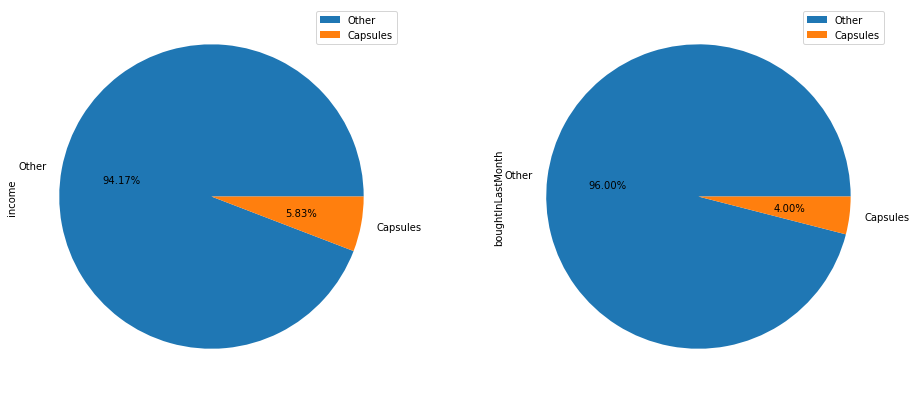

In [33]:
# Считаем доход и общее количество проданных капсул, строим график

capsules = top_kitchen.groupby('capsules').sum()[['income', 'boughtInLastMonth']]

f,ax=plt.subplots(1,2,figsize=(16,7))
la = ['Other', 'Capsules']
capsules.plot.pie(y = 'income', autopct='%1.2f%%', ax=ax[0], labels = la)
capsules.plot.pie(y = 'boughtInLastMonth', autopct='%1.2f%%', ax=ax[1], labels = la);

In [34]:
print('Kапсулы для кошемашин составляют', round(len(top_kitchen[top_kitchen['capsules'] == 1])/len(top_kitchen)*100, 2), 
      '% от всех кухонных принадлежностей, при этом приносят 5.83% дохода и составляют 4% от общего числа продаж ')

Kапсулы для кошемашин составляют 1.01 % от всех кухонных принадлежностей, при этом приносят 5.83% дохода и составляют 4% от общего числа продаж 


### Самые популярные слова в категории Kitchen & Dining

Посмотрим распределение количество покупок за прошлый месяц товаров для кухни

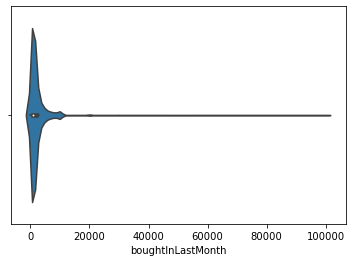

In [35]:
sns.violinplot(x=products_data.query("category_name == 'Kitchen & Dining'")['boughtInLastMonth']);

In [36]:
kitchen = products_data[products_data['category_name'] == 'Kitchen & Dining']
kitchen['boughtInLastMonth'].describe()

count      4864.000000
mean       2136.328125
std        4138.002555
min           0.000000
25%         900.000000
50%        1000.000000
75%        2000.000000
max      100000.000000
Name: boughtInLastMonth, dtype: float64

50% товаров купили менее 900 раз. Для анализа популярности слов в названиях товаров, будем использовать только товары, купленные более 1000 раз.

In [37]:
# Копируем названия всех товаров в список

text = kitchen['title'].tolist()

In [38]:
# Применяем функцию подготовки текста
text = prep(text)
text

'timers digital kitchen timer magnetic with large led display liorque countdown countup timer for cooking classroom fitness volume adjustable easy for kids and seniorsaluminium alloy knob black  in  stuffed burger press patty maker rings molds kit non stick stuffer hamburger press patty maker  with  pcs wax hamburger patty paper sausage patty press for sliderpattiegrilling hahayoo celestial seasonings herbal tea bengal spice  count pack of  qimh colander collapsible colander strainer over the sink vegetablefruit colanders strainers  quart with extendable handles new kitchen essentials american metalcraft hactp coupe style pan heavy weight  gauge thickness  dia aluminum silver wooden spoons for cooking pack wooden utensils for cooking wooden kitchen utensils set wooden cooking utensils natural teak wooden spatulas for cooking aigostar electric kettle temperature control  tea infuser l hot water tea kettle with variable temperature led indicator light change auto shutoff cupcake stand to

In [39]:
# добавляем стоп-слова
english_stopwords = stopwords.words("english")
words = ['pack', 'oz', 'inch', 'pcs', 'count', 'x', 'kitchen']
english_stopwords.extend(words)

# токенизируем текст
text_tokens = word_tokenize(text)

# перестраиваем токены, не учитывая стоп-слова
text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]

#приводим токены к текстовому виду
text = nltk.Text(text_tokens)

# считаем частоту слов
fdist_sw = FreqDist(text)

# показываем самые популярные
print(fdist_sw.most_common(20))

[('coffee', 1210), ('steel', 952), ('stainless', 875), ('tea', 871), ('set', 807), ('black', 619), ('food', 514), ('baking', 464), ('cup', 448), ('cooking', 437), ('silicone', 428), ('roast', 422), ('maker', 404), ('nonstick', 370), ('ice', 358), ('brush', 357), ('bags', 347), ('glass', 332), ('cleaning', 329), ('safe', 316)]


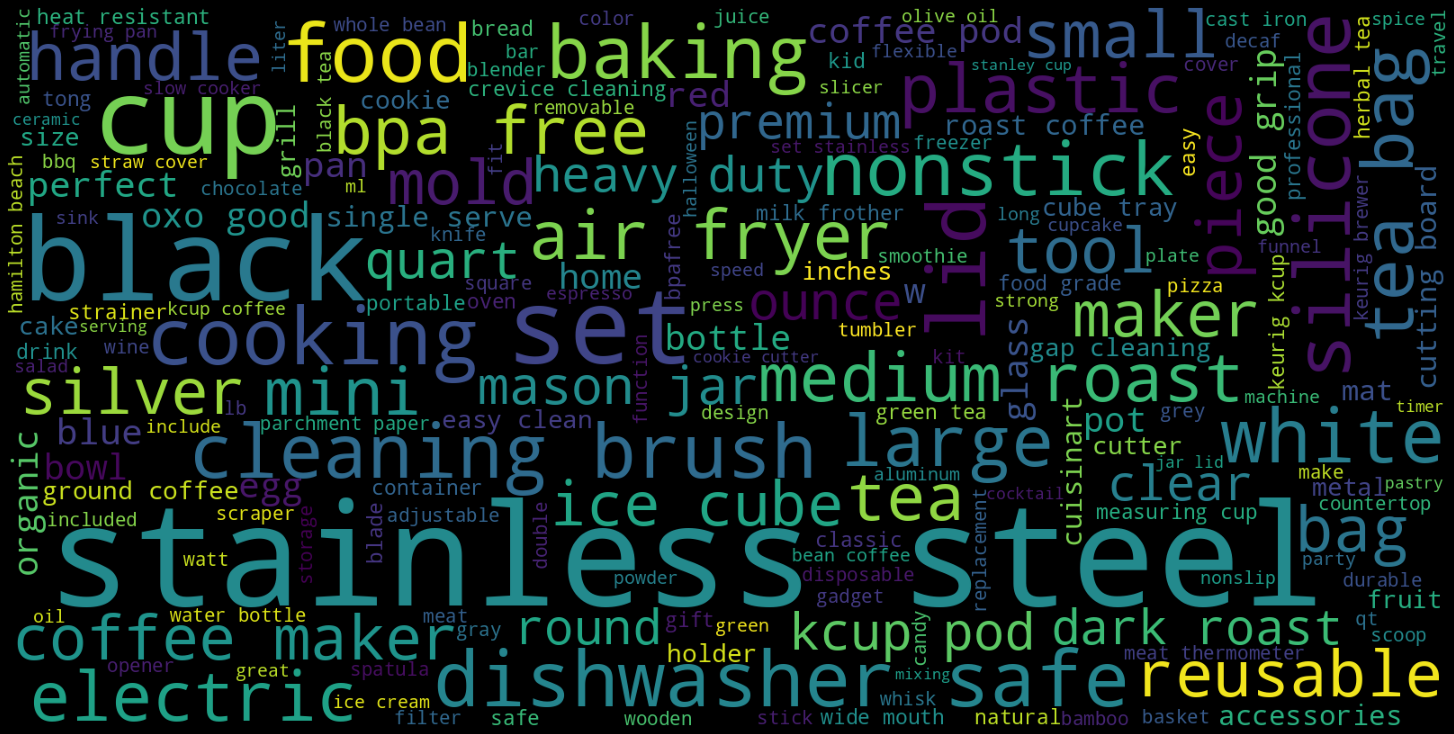

In [40]:
# переводим всё в текстовый формат
text_raw = " ".join(text)

# готовим размер картинки
wordcloud = WordCloud(width=1600, height=800).generate(text_raw)
plt.figure( figsize=(20,10), facecolor='k')
# добавляем туда облако слов
plt.imshow(wordcloud)
# выключаем оси и подписи
plt.axis("off")
# убираем рамку вокруг
plt.tight_layout(pad=0)
# выводим картинку на экран
plt.show()

Самое популярное слово в названиях товаров для кухни - coffee. Кофе очень популярно в Америке, это подтверждается и тем, что капсулы для кофемашин - самый продаваемый товар в данной категории, так же популярными словами являются степени обжарки: dark, medium roast.

Следующие по популярности: steel и stainless - товары из нержавеющей стали. В дальнейшем анализе можно подробнее посмотреть, что это за товары.

Плюс очень популярен чай.

### Выводы:

Самым прибыльным товаром является игровая консоль PlayStation 5 (PS5), в прошлом месяце ее купили 10000 раз, доход от продаж составил почти 5 млн долларов. В данной категории товаров самыми покупаемыми являются игровые консоли (Xbox, PlayStation, Nintendo и наборы виртуальной реальности).

При этом, самыми популярными товарами на платформе являются бытовые товары: товары для кухни, средства по уходу за кожей и волосами, товары для организации хранения дома, игрушки, средства для уборки. Все они имеют небольшую стоимость 15-24 долларов и нужны регулярно.

Так же особняком стоит кофе (в категории товаров для кухни), очень популярны капсулы для кофемашин, они составляют всего 1% от общего числа товаров для кухни, но приносят почти 6% от всего дохода.